# Brain Tumor Classification

## Problem Statement:

Brain tumors are among the most critical and life-threatening conditions that require timely and accurate diagnosis. Early detection and classification of brain tumors play a crucial role in patient treatment and survival. However, manual examination of brain scans by radiologists can be time-consuming and prone to human error, especially when dealing with large datasets or subtle tumor features.

The goal of this project is to develop an automated system using deep learning techniques to classify brain tumors based on MRI scan images. The system will leverage transfer learning from pre-trained models to improve accuracy and efficiency in distinguishing between tumor and non-tumor images. This approach aims to aid radiologists and healthcare providers in making faster, more reliable diagnoses, ultimately improving patient outcomes.

## Key Objectives:

- To build a deep learning model for brain tumor classification using MRI images.
- To utilize transfer learning for feature extraction and fine-tuning from pre-trained models.
- To evaluate model performance in terms of accuracy, precision, recall, and F1 score, ensuring it meets clinical standards for real-world applications.

In [2]:
# import base libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2024-09-09 14:40:24.584960: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Dataset

The dataset used in this project consists of `3,762` preprocessed brain scan images, each with a resolution of `(240, 240, 3)`. These images have already been converted into NumPy arrays and normalized, with pixel values scaled to a range of 0 to 1. The dataset has been appropriately split into training and testing sets. Both `train_data.npz` and `test_data.npz` contain the training and testing numpy images, labeled as X, and their corresponding labels, labeled as Y.



**This dataset was originally prepared as part of my summative project, which involved developing a Convolutional Neural Network (CNN) model from scratch for brain tumor classification.**

[Github: Brain Tumor Classification](https://github.com/kayc0des/brain_tumor_model)

In [ ]:
# Download test data from Github

!wget https://github.com/kayc0des/brain_tumor_model/blob/main/data/test/test_data.npz

--2024-09-08 08:07:31--  https://github.com/kayc0des/brain_tumor_model/blob/main/data/test/test_data.npz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘test_data.npz’

test_data.npz           [ <=>                ] 164.54K  --.-KB/s    in 0.05s   

2024-09-08 08:07:32 (3.19 MB/s) - ‘test_data.npz’ saved [168488]



In [ ]:
# Download train data from Github

!wget https://github.com/kayc0des/brain_tumor_model/blob/main/data/train/train_data.npz

--2024-09-08 08:09:02--  https://github.com/kayc0des/brain_tumor_model/blob/main/data/train/train_data.npz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train_data.npz’

train_data.npz          [ <=>                ] 288.06K  --.-KB/s    in 0.05s   

2024-09-08 08:09:03 (5.45 MB/s) - ‘train_data.npz’ saved [294972]



In [ ]:
# However the above method utilizes session storage, so I'll get the data from my drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
test_data = np.load('data/test_data.npz')
train_data = np.load('data/train_data.npz')

X_train = train_data['X']
Y_train = train_data['Y']

X_test = test_data['X']
Y_test = test_data['Y']

print(X_train[0])
print(Y_train[0])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[1. 0.]


# Using ResNet50

ResNet50 is a powerful and widely used model in computer vision tasks due to its unique **residual learning** approach. Residual connections help the model overcome the **vanishing gradient problem**, making it capable of training deeper networks effectively. This ability to train deep layers is beneficial when working with complex image classification tasks like brain tumor detection, where subtle variations in the images can be crucial for accurate classification. Additionally, ResNet50 is pre-trained on a large dataset (ImageNet), allowing it to generalize better and extract relevant features when fine-tuned on a medical dataset like brain tumor scans.

More on ResNet50: [Documentation](https://keras.io/api/applications/resnet/#resnet50-function)

In [4]:
# import needed libraries

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

In [ ]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

# Freeze layers of the pre-trained model
for layer in resnet.layers:
    layer.trainable = False

resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 240, 240, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 246, 246, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 120, 120, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 120, 120, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 120, 120, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 122, 122, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 60, 60, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 60, 60, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 60, 60, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 60, 60, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 60, 60, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 60, 60, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 60, 60, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 60, 60, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 60, 60, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 758s 10s/step - accuracy: 0.5391 - loss: 1.7254 - val_accuracy: 0.7575 - val_loss: 0.5854
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 786s 10s/step - accuracy: 0.7771 - loss: 0.5530 - val_accuracy: 0.7940 - val_loss: 0.4869
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 790s 10s/step - accuracy: 0.7956 - loss: 0.5051 - val_accuracy: 0.8206 - val_loss: 0.4414
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 765s 10s/step - accuracy: 0.8327 - loss: 0.4402 - val_accuracy: 0.8206 - val_loss: 0.4481
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 857s 11s/step - accuracy: 0.8325 - loss: 0.4238 - val_accuracy: 0.8472 - val_loss: 0.4167
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 785s 10s/step - accuracy: 0.8557 - loss: 0.3766 - val_accuracy: 0.8488 - val_loss: 0.4003
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 738s 10s/step - accuracy: 0.8610 - loss: 0.3650 - val_accuracy: 0.8306 - val_loss: 0.4123
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 802s 10s/step - accuracy: 0.8705 - loss: 0.3550 - val_accuracy: 0.

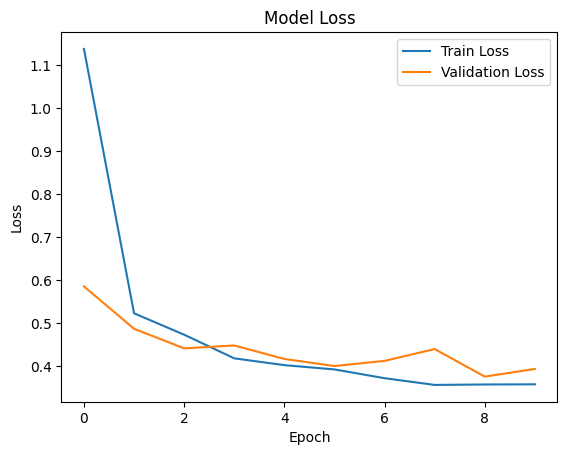

In [ ]:
# Adding custom layers
x = Flatten()(resnet.output)
x = Dense(64, activation='relu', kernel_regularizer=L2(0.01))(x)
output = Dense(2, activation='softmax')(x)

# Create x Compile
model = Model(inputs=resnet.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

# Convert predictions to binary labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

report = classification_report(y_true, y_pred_classes, target_names=['No Tumor', 'Tumor'])
print(report)

24/24 ━━━━━━━━━━━━━━━━━━━━ 189s 8s/step
              precision    recall  f1-score   support

    No Tumor       0.92      0.81      0.86       419
       Tumor       0.80      0.91      0.85       334

    accuracy                           0.86       753
   macro avg       0.86      0.86      0.86       753
weighted avg       0.87      0.86      0.86       753



# Using VGG16

In [13]:
from tensorflow.keras.applications import VGG16
from keras.layers import Flatten, Dense, AveragePooling2D, Input

In [14]:
weights = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg = VGG16(weights=weights, include_top=False, input_shape=(240, 240, 3))

for layer in vgg.layers:
    layer.trainable = False

vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 675s 9s/step - accuracy: 0.7539 - loss: 3.3448 - val_accuracy: 0.8588 - val_loss: 2.0092
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 672s 9s/step - accuracy: 0.8885 - loss: 1.8054 - val_accuracy: 0.8738 - val_loss: 1.4531
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 655s 9s/step - accuracy: 0.9036 - loss: 1.3719 - val_accuracy: 0.9086 - val_loss: 1.2166
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 723s 10s/step - accuracy: 0.9187 - loss: 1.1621 - val_accuracy: 0.9070 - val_loss: 1.1017
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 846s 11s/step - accuracy: 0.9303 - loss: 1.0163 - val_accuracy: 0.9169 - val_loss: 0.9902
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 648s 8s/step - accuracy: 0.9385 - loss: 0.9374 - val_accuracy: 0.9252 - val_loss: 0.9056
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 657s 9s/step - accuracy: 0.9417 - loss: 0.8525 - val_accuracy: 0.9269 - val_loss: 0.8312
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 629s 8s/step - accuracy: 0.9406 - loss: 0.7886 - val_accuracy: 0.8754 -

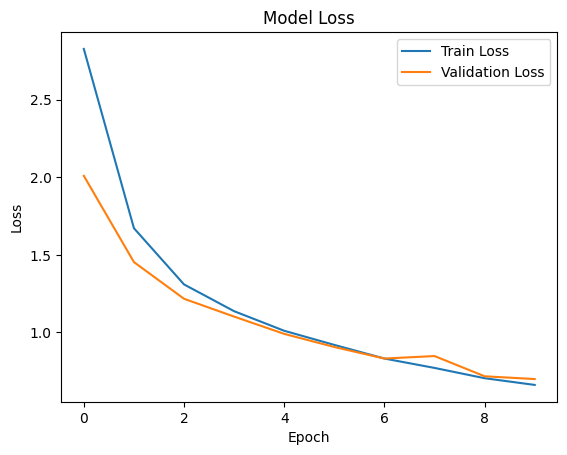

In [15]:
# Adding custom layers
x = Flatten()(vgg.output)
x = Dense(128, activation='relu', kernel_regularizer=L2(0.01))(x)
x = Dense(64, activation='relu', kernel_regularizer=L2(0.01))(x)
output = Dense(2, activation='softmax')(x)

# Create and compile the model
vgg_model = Model(inputs=vgg.input, outputs=output)

vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = vgg_model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import classification_report

y_pred = vgg_model.predict(X_test)

# Convert predictions to binary labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

report = classification_report(y_true, y_pred_classes, target_names=['No Tumor', 'Tumor'])
print(report)

24/24 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step
              precision    recall  f1-score   support

    No Tumor       0.90      0.98      0.94       419
       Tumor       0.97      0.87      0.91       334

    accuracy                           0.93       753
   macro avg       0.93      0.92      0.93       753
weighted avg       0.93      0.93      0.93       753



# Using EfficientNetB0

ResNet50 is a powerful and widely used model in computer vision tasks due to its unique residual learning approach. Residual connections help the model overcome the vanishing gradient problem, making it capable of training deeper networks effectively. This ability to train deep layers is beneficial when working with complex image classification tasks like brain tumor detection, where subtle variations in the images can be crucial for accurate classification. Additionally, ResNet50 is pre-trained on a large dataset (ImageNet), allowing it to generalize better and extract relevant features when fine-tuned on a medical dataset like brain tumor scans.

[Documentation](https://keras.io/api/applications/efficientnet/#efficientnetb0-function)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.4971 - loss: 1.9915 - val_accuracy: 0.5332 - val_loss: 1.2583
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 404s 5s/step - accuracy: 0.5551 - loss: 1.1977 - val_accuracy: 0.5332 - val_loss: 1.0643
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.5480 - loss: 1.0325 - val_accuracy: 0.5332 - val_loss: 0.9571
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.5636 - loss: 0.9428 - val_accuracy: 0.5332 - val_loss: 0.8897
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 382s 4s/step - accuracy: 0.5600 - loss: 0.8704 - val_accuracy: 0.5332 - val_loss: 0.8402
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.5551 - loss: 0.8263 - val_accuracy: 0.5332 - val_loss: 0.8056
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 375s 4s/step - accuracy: 0.5637 - loss: 0.7918 - val_accuracy: 0.5332 - val_loss: 0.7802
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 361s 4s/step - accuracy: 0.5498 - loss: 0.7715 - val_accuracy: 0.5332 - v

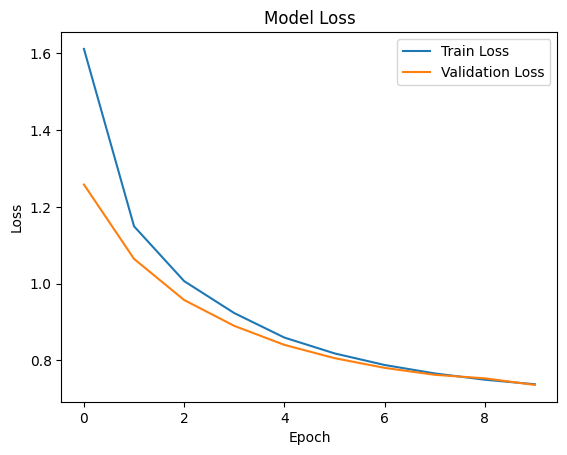

In [ ]:
enet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

for layer in enet.layers:
    layer.trainable = False

# Adding custom layers
x = Flatten()(enet.output)
x = Dense(64, activation='relu', kernel_regularizer=L2(0.01))(x)
output = Dense(2, activation='softmax')(x)

# Create and compile the model
enet_model = Model(inputs=enet.input, outputs=output)

enet_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = enet_model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32)

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = enet_model.predict(X_test)

# Convert predictions to binary labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

report = classification_report(y_true, y_pred_classes, target_names=['No Tumor', 'Tumor'])
print(report)

24/24 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step
              precision    recall  f1-score   support

    No Tumor       0.56      1.00      0.72       419
       Tumor       0.00      0.00      0.00       334

    accuracy                           0.56       753
   macro avg       0.28      0.50      0.36       753
weighted avg       0.31      0.56      0.40       753



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
